### AUC的数值基础

在ROC-AUC的应用中,ROC曲线一般也同时会对应一个AUC值,既Area Under Curve (ROC曲线下方的面积大小).

**AUC的意义**: AUC是衡量二分类模型优劣的一种评价指标，表示预测的正例排在负例前面的概率。

**取值范围**: AUC面积的大小取值在[0,1]之间. 

**Threshold**: 由于ROC曲线一般都处于y=x这条直线 (在二分类问题中, 我们不够在任何模型, 进行random guess 的概率就是0.5) 的上方,所以AUC的取值范围应该在0.5和1之间.AUC越接近1.0,检测方法真实性越高;等于0.5时,则真实性最低,无应用价值. 

***需要再这里穿插一张带AUC的ROC图***

### AUC的计算
**AUC的计算公式**如下:
$$
AUC\,\,=\,\,\frac{\sum{rank_i*label_i\,\,-\,\,\frac{M\left( 1+M \right)}{2}}}{M*N}
$$
where:

1). rank is based on its probability among the whole dataset and

2). M = the number of positives (1) and N = the number of negatives (0)

从公式中我们可以看到, 我们需要进行一些如下的操作:
- 需要知道数据集中一共有多少个 positive 和 negative cases. (True label). 既算法中的M和N
- 需要知道每一个数据点 （probability）在数据集中的rank是多少, 既$rank_i$
- 需要知道每一个数据点所对应的true label, 既$label_i$

### 一个简单的例子
我们构造一个足够简单的数据集, 取名df_simple.

In [1]:
#首先导入基本数据库
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import seaborn as sns

In [2]:
d = {'ID' :['A','B','C','D','E','F','G'], 'label' :[1,1,0,0,1,1,0], 'prob' : [0.8,0.7,0.5,0.5,0.5,0.5,0.3]}
df_simple = pd.DataFrame(data = d)
df_simple

,ID,label,prob
0,A,1,0.8
1,B,1,0.7
2,C,0,0.5
3,D,0,0.5
4,E,1,0.5
5,F,1,0.5
6,G,0,0.3


1. 从上图的dataframe中可以看到, 我们一共有 4 个positive cases, 和3个negative cases.<br>
所以M =4, N=3
2. 接下来我们需要得到每个case根据probability的rank结果

In [3]:
df_simple['rank'] = df_simple.prob.rank(method = 'average')
df_simple

,ID,label,prob,rank
0,A,1,0.8,7.0
1,B,1,0.7,6.0
2,C,0,0.5,3.5
3,D,0,0.5,3.5
4,E,1,0.5,3.5
5,F,1,0.5,3.5
6,G,0,0.3,1.0


3. 在得到rank后, 就可以利用公式进行计算:

$\begin{aligned}
AUC & = \frac{(1*7+1*6+0*3.5+0*3.5+1*3.5+1*3.5++0*1)-\frac{4*(1+4)}{2}}{4*3} \\
&= 0.8333
\end{aligned}$


4. 通过和build-in function的结果进行对比, 结果一致!

In [4]:
# 使用build-in function进行对比
AUC_test = roc_auc_score(df_simple.label,df_simple.prob)
print(' USing build-in function, we have the AUC value be %0.4f' %AUC_test)

 USing build-in function, we have the AUC value be 0.8333


### 模拟数据集(和ROC文一致)
和<ROC曲线 (***看一下是不是这个名字***)>文章对应, 我们本篇同样通过手动来实现AUC的代码. 并且为了和ROC文章相呼应, 我们这里采取ROC文章中同样的模拟集, 模拟方法和ROC文章中一样, 并且通过set seed来模拟出同样的数数据集.

In [5]:
#使用模拟构造数据集 simulated true labels and probability
np.random.seed(3000) #set seed so the results are reproducible
# 模拟500个样本
#初始化样本标签，假设1为正例，0为负例
train_label = np.random.randint(0,2,size=500)

#产生500个概率值（置信度），即单个样本值为正例的概率, round为小数
train_prob = np.random.rand(500).round(2)

In [6]:
# Combine arrays to be data frame to better visilize it
df = pd.DataFrame(np.c_[train_prob,train_label],columns=['Prob','True_label'])
df.head()

,Prob,True_label
0,0.33,0.0
1,0.87,1.0
2,0.01,0.0
3,0.12,1.0
4,0.23,0.0


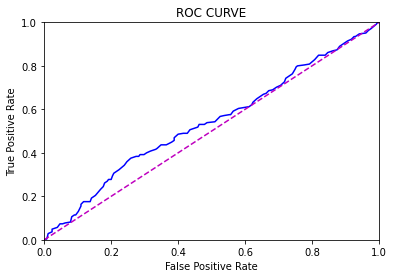

In [7]:
fpr, tpr, thresholds = roc_curve(df.True_label, df.Prob)
plt.figure()
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(fpr,tpr,color='b') #build-in function下的ROC曲线为蓝色
plt.plot([0, 1], [0, 1], color='m', linestyle='--') # y=x curve
plt.show()

可以看到ROC文章中的ROC曲线和上图是一样的.

### 衍生到general的情景, 手动实现
下面我们从简单的例子衍生到generalized情况, 且用code来表达:

In [8]:
def auc_calculate(np_labels,np_prob,n_bins=100):
    # number of positive
    postive_num = sum(np_labels)
    # number of negatives N
    negative_num = len(np_labels) - postive_num
    #rank probabilities using rankdata function
    prob_rank = rankdata(np_prob)
    #use dot product to realize the matrix production
    auc = (np.dot(np_labels,prob_rank.T) - 0.5*(postive_num*(1+postive_num)))/(postive_num * negative_num)
    #return satisfied_pair / total
    return auc 

In [9]:
#使用我们手动实现的代码计算AUC
auc_manual = auc_calculate(df.True_label.values,df.Prob.values,n_bins=100)
auc_manual

0.5398559423769508

In [10]:
#使用sklearn包里的代码直接计算AUC
auc_sklearn = roc_auc_score(df.True_label,df.Prob)
auc_sklearn

0.5398559423769508

通过比较可以发现, 我们手动实现得到的AUC和sklearn库里build-in function (roc_auc_score)得到的AUC是**完全一致**.

通常来说, 我们会将AUC-ROC画在同一个plot里, 示范如下:

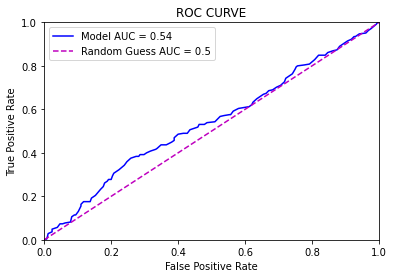

In [11]:
plt.figure()
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(fpr,tpr,color='b', label = 'Model AUC = %0.2f'% auc_manual) #build-in function下的ROC曲线为蓝色
plt.plot([0, 1], [0, 1], color='m', linestyle='--', label = 'Random Guess AUC = 0.5') # y=x curve
plt.legend(loc = 'upper left')
plt.show()

### AUC的判断与比较

**从AUC 判断分类器（预测模型）优劣的标准**：
- AUC = 1，是完美分类器。
- AUC = [0.85, 0.95], 效果很好
- AUC = [0.7, 0.85], 效果一般
- AUC = [0.5, 0.7],效果较低，但用于预测股票已经很不错了
- AUC = 0.5，跟随机猜测一样（例：丢铜板），模型没有预测价值。
- AUC < 0.5，比随机猜测还差；但只要总是反预测而行 (既模型预测不是positive, 而是negative)，就优于随机猜测. 比如得到的AUC是0.3, 很有可能是因为模型是在预测negative, 那么实际上如果去预测positive, 我们可能得到 1- 0.3 = 0.7的AUC!

**比较不同模型的AUC**: 我们往往使用AUC值作为模型的评价标准是因为很多时候ROC曲线并不能清晰的说明哪个分类器的效果更好，而作为一个数值，对应AUC更大的分类器效果更好。

**为什么要比较AUC**: 如果两条ROC曲线没有相交，我们可以根据哪条曲线最靠近左上角哪条曲线代表的学习器性能就最好。但是，实际任务中，情况很复杂，如果两条ROC曲线发生了交叉，则很难一般性地断言谁优谁劣。在很多实际应用中，我们往往希望把学习器性能分出个高低来。在此引入AUC面积。
在进行学习器的比较时，若一个学习器的ROC曲线被另一个学习器的曲线完全“包住”，则可断言后者的性能优于前者；若两个学习器的ROC曲线发生交叉，则难以一般性的断言两者孰优孰劣。此时如果一定要进行比较，则比较合理的判断依据是比较ROC曲线下的面积，即AUC.

**AUC的局限性**: AUC可以用来评价ROC曲线的上凸程度。从这里也可以看出，AUC *只能* 用于二分类模型的评估。